### This is an analysis of suicides 

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [2]:
df=pd.read_csv("suicide_rates_overview_1985_to_2016.csv")

In [3]:
print (('The data has the following shape'), df.shape)
print ("\n")
df.info()

The data has the following shape (27820, 12)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
df.drop('HDI for year', axis=1, inplace = True)

In [6]:
df.drop('country-year', axis=1, inplace = True)

- GDP gdp_for_year is an object, change to a number as may need it later.
- But first I need to remaove the ','!
- First attempt, the program didn't like the $ symbol

In [7]:
df = df.rename(columns={'gdp_per_capita ($)': 'gdp_capita', ' gdp_for_year ($) ':'gdp_year', 'suicides/100k pop': 'suicides_100k'})
df.head()

,country,year,sex,age,suicides_no,population,suicides_100k,gdp_year,gdp_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [8]:
# I want to conver the arguements to a numeric type.
for k in list(df):
    df[k]=pd.to_numeric(df[k], errors='ignore')
df.dtypes
# ref: https://stackoverflow.com/questions/47393134/attributeerror-dataframe-object-has-no-attribute-infer-objects/48338734#48338734

country           object
year               int64
sex               object
age               object
suicides_no        int64
population         int64
suicides_100k    float64
gdp_year          object
gdp_capita         int64
generation        object
dtype: object

In [9]:
df.describe()

,year,suicides_no,population,suicides_100k,gdp_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [10]:
print (df['country'].nunique())
print ("\n")
print (df['year'].nunique())
print ("\n")
print (df['age'].nunique())
print ("\n")

101


32


6




### In this data frame, we have the following entries
- country, 101
- year 32 different years 
- sex: Male or female
- age: 6 Categories
- suicides_no
- population
- suicides/100k pop
- country-year
- HDI for year: *The Human Development Index (HDI) is a statistic composite index of life expectancy, education, and per capita income indicators, which are used to rank countries into four tiers of human development. A country scores a higher HDI when the lifespan is higher, the education level is higher, and the gross national income GNI (PPP) per capita is higher*. **Data incomplete, therefore deleted** 
- gdp_for_year (in dollars)
- gdp_per_capita (in dollars)
- generation: Is a steriotypy of different attributes, they include 'Generation X', 'Silent', 'G.I. Generation', 'Boomers', 'Millenials', 'Generation Z'.

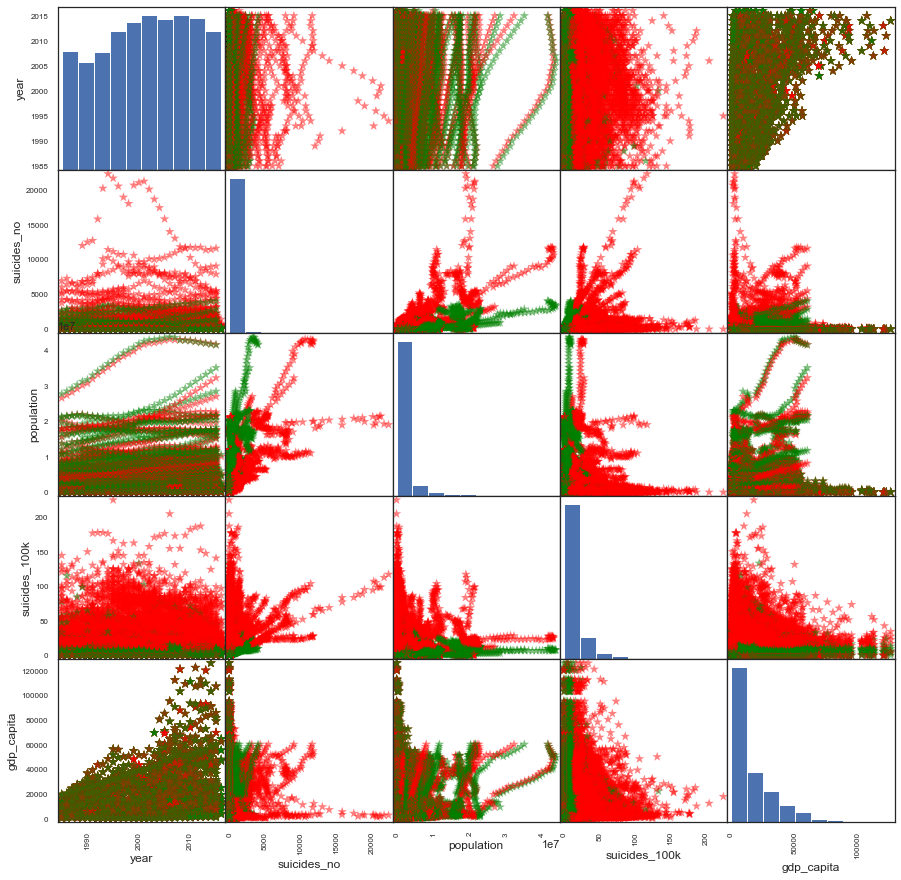

In [34]:
color_list = ['red' if i=='male' else 'green' for i in df.loc[:,'sex']]
pd.plotting.scatter_matrix(df.loc[:,df.columns != 'sex'],
                          c = color_list,
                          figsize = [15,15],
                          diagonal = 'hist',
                          alpha = 0.5, 
                          s = 100,
                          marker = '*')
plt.show()

- I want to group the data by high, medium and low suicide rates.
- This will be done by quartiles, taken from the data describe.
- Less than 1 suicide/100k will be low, Less than 6 suicide/100k will be Moderate,
- Less than 16 suicide/100k will be Medium,Greater than 17 will be high

In [11]:
bins = [0, 10, 15, 16,]
names = ['Low', 'Medium', 'High', 'Very High',]

d = dict(enumerate(names, 1))

df['Suicide_Range'] = np.vectorize(d.get)(np.digitize(df['suicides_100k'], bins))
df
# Ref: https://stackoverflow.com/questions/49382207/how-to-map-numeric-data-into-categories-bins-in-pandas-dataframe

,country,year,sex,age,suicides_no,population,suicides_100k,gdp_year,gdp_capita,generation,Suicide_Range
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X,Low
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent,Low
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X,Low
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation,Low
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers,Low
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X,Low
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent,Low
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z,Low
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z,Low


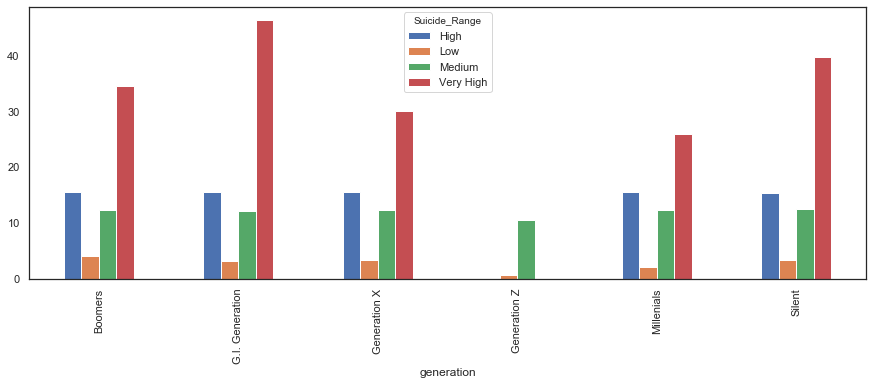

In [12]:
df.groupby(['Suicide_Range', 'generation'])['suicides_100k'].mean().unstack(level=0).plot(kind='bar', figsize=(15,5))

In [13]:
suicides_100k_year = df.groupby('year').mean()
suicides_100k_year['suicides_100k']


year
1985    11.826198
1986    11.423333
1987    11.644213
1988    12.709405
1989    12.879071
1990    12.862956
1991    13.438880
1992    13.498564
1993    13.833705
1994    14.073272
1995    15.662671
1996    15.305422
1997    14.954361
1998    14.926920
1999    14.532038
2000    13.941328
2001    13.519138
2002    13.786550
2003    13.205019
2004    12.481944
2005    12.068442
2006    11.927461
2007    12.025339
2008    11.907686
2009    11.400787
2010    11.215900
2011    11.015349
2012    11.421718
2013    11.107958
2014    11.011464
2015    11.094073
2016    13.421188
Name: suicides_100k, dtype: float64

Text(0.5, 0, 'Year')

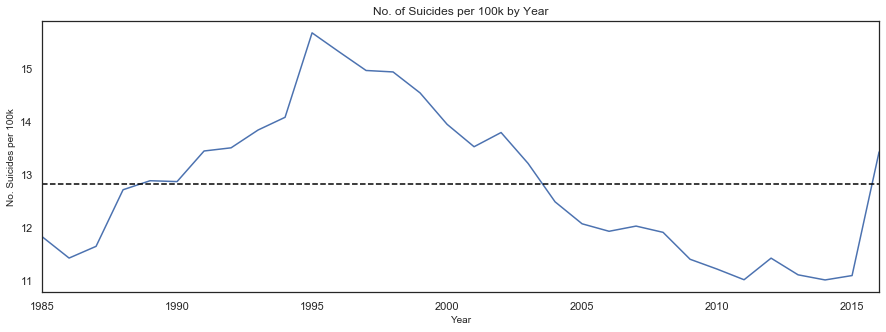

In [14]:
suicides_100k_year['suicides_100k'].plot(figsize=(15,5))
plt.title('No. of Suicides per 100k by Year', fontsize = 12)
plt.axhline(y= 12.81609, color='black', linestyle='--')
plt.ylabel('No. Suicides per 100k', fontsize = 10)
plt.xlabel('Year', fontsize = 10)

In [15]:
suicides_country = df.groupby('country').sum()
suicides_country['suicides_100k']

country
Albania                  924.76
Antigua and Barbuda      179.14
Argentina               3894.59
Armenia                  976.21
Aruba                   1596.52
                         ...   
United Arab Emirates      94.89
United Kingdom          2790.92
United States           5140.97
Uruguay                 6538.96
Uzbekistan              2138.17
Name: suicides_100k, Length: 101, dtype: float64

Text(0.5, 0, 'Country')

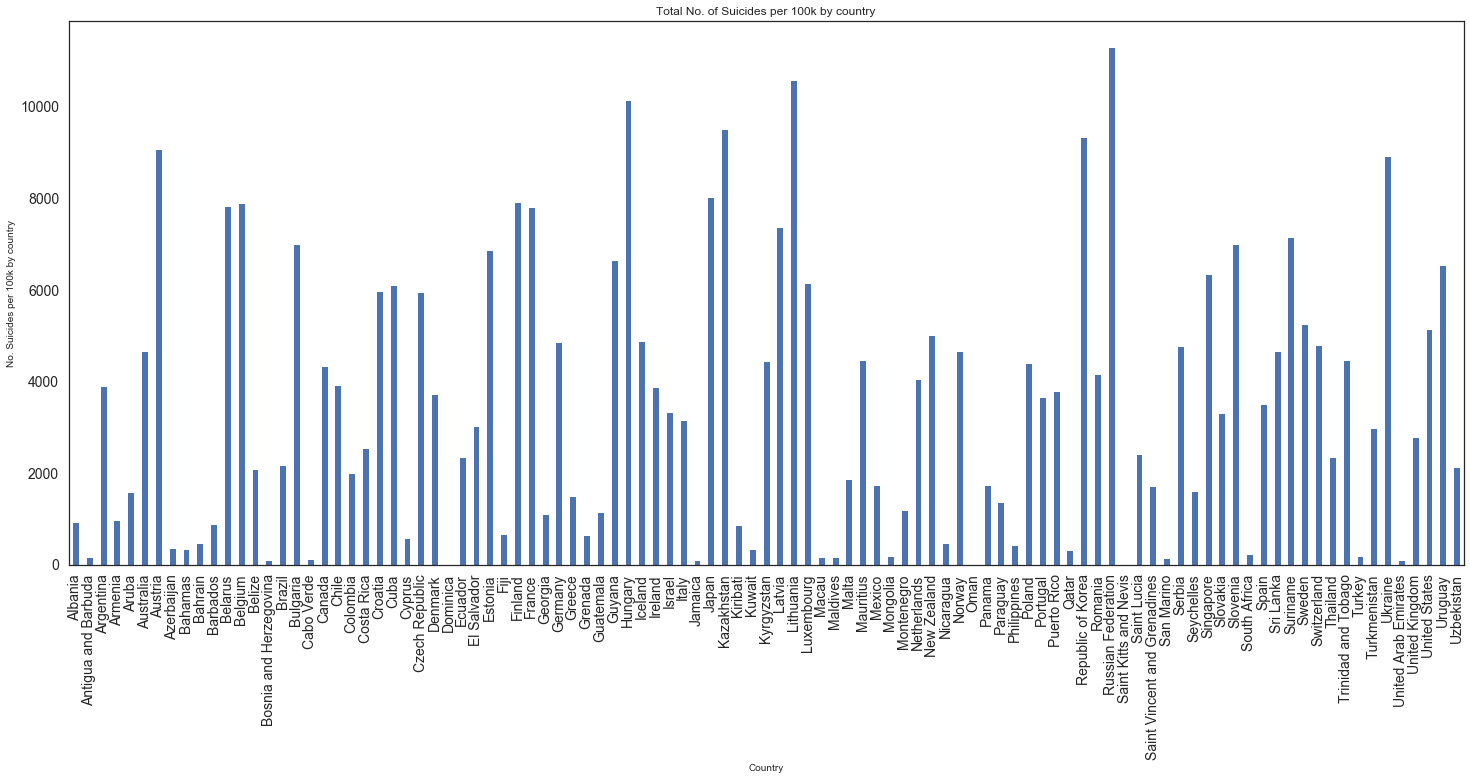

In [16]:
suicides_country['suicides_100k'].plot(kind = 'bar', figsize=(25,10), fontsize=14)
plt.title('Total No. of Suicides per 100k by country', fontsize = 12)
#plt.axhline(y= 12.81609, color='black', linestyle='--')
plt.ylabel('No. Suicides per 100k by country', fontsize = 10)
plt.xlabel('Country', fontsize = 10)

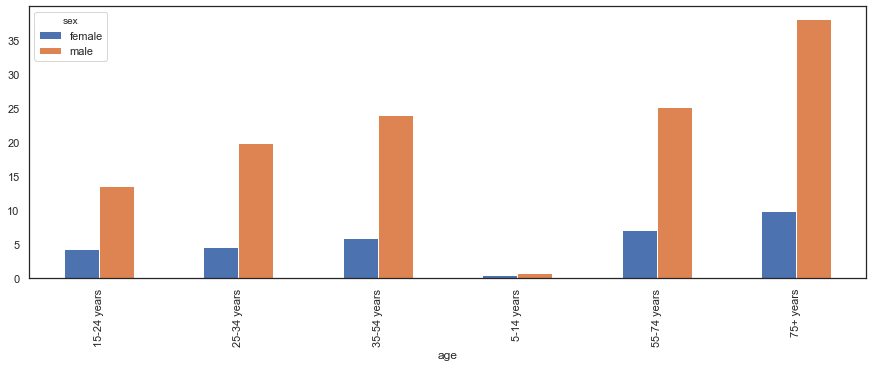

In [17]:
df.groupby(['sex', 'age'])['suicides_100k'].mean().unstack(level=0).plot(kind='bar', figsize=(15,5))

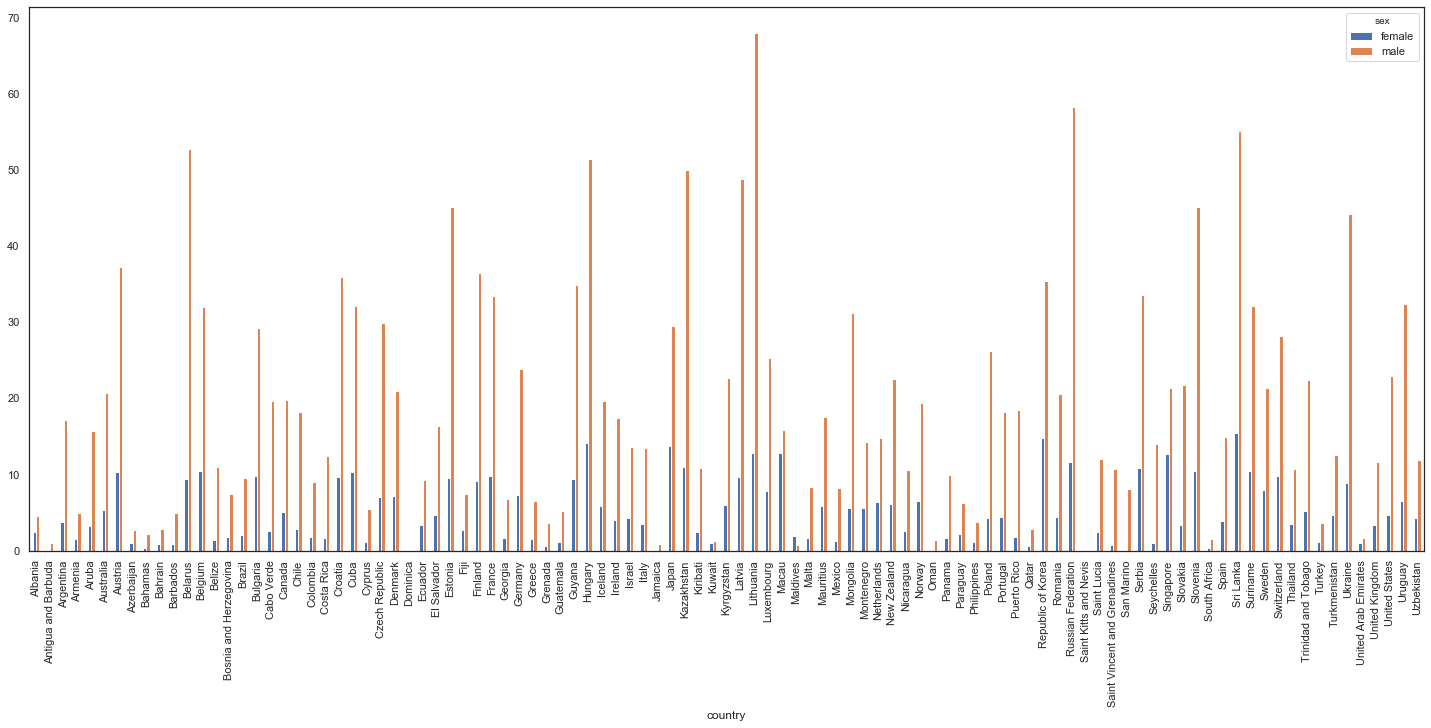

In [18]:
# There is a very obvious trend here that Males are the most likely to commit suidide.
# The male suicides in the 75+ category is surprising.
# The plot below shpws the number of suicides per country again, grouped by sex.
df.groupby(['sex', 'country'])['suicides_100k'].mean().unstack(level=0).plot(kind='bar', figsize=(25,10))

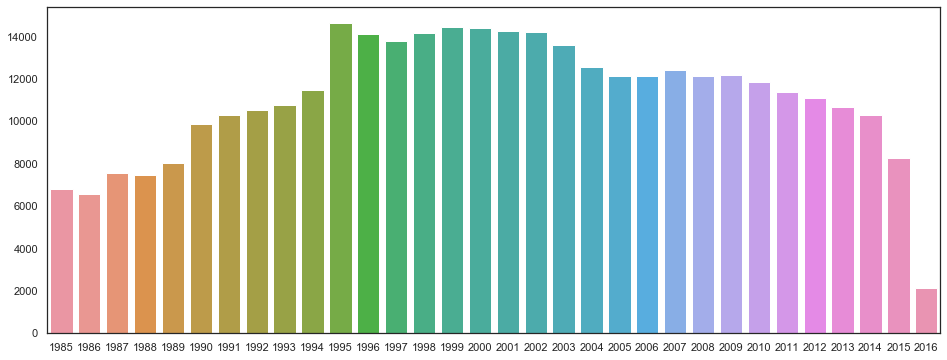

In [19]:
# Check and plot what year had the highest number of suicides
suicides_year = []

for y in df['year'].unique():
    suicides_year.append(sum(df[df['year'] == y]['suicides_100k']))

plt.figure(figsize=(16, 6))
sns.barplot(x = df['year'].unique(), y = suicides_year)


- My research will now switch to Ireland

In [21]:
df_Eire = df[df['country'] == 'Ireland']

In [22]:
df_Eire

,country,year,sex,age,suicides_no,population,suicides_100k,gdp_year,gdp_capita,generation,Suicide_Range
12056,Ireland,1985,male,55-74 years,65,251800,25.81,"21,295,486,383",6638,G.I. Generation,Very High
12057,Ireland,1985,male,25-34 years,47,251000,18.73,"21,295,486,383",6638,Boomers,Very High
12058,Ireland,1985,male,15-24 years,48,314400,15.27,"21,295,486,383",6638,Generation X,High
12059,Ireland,1985,male,35-54 years,51,367300,13.89,"21,295,486,383",6638,Silent,Medium
12060,Ireland,1985,female,55-74 years,21,274200,7.66,"21,295,486,383",6638,G.I. Generation,Low
...,...,...,...,...,...,...,...,...,...,...,...
12411,Ireland,2014,female,15-24 years,11,261032,4.21,"258,099,014,042",59634,Millenials,Low
12412,Ireland,2014,female,55-74 years,15,432815,3.47,"258,099,014,042",59634,Boomers,Low
12413,Ireland,2014,female,75+ years,2,141441,1.41,"258,099,014,042",59634,Silent,Low
12414,Ireland,2014,male,5-14 years,2,335330,0.60,"258,099,014,042",59634,Generation Z,Low


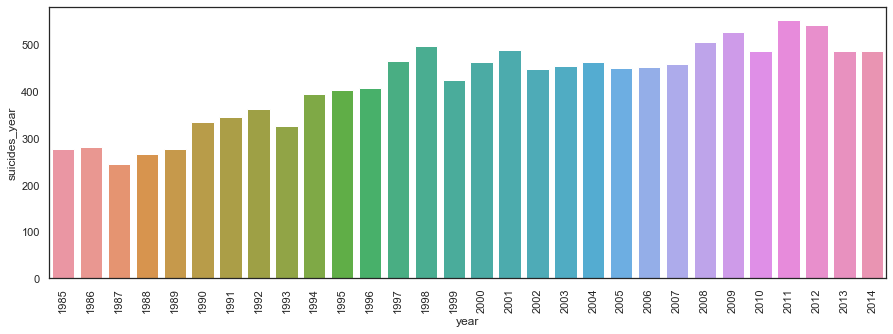

In [23]:
suicides_year = []

for y in df_Eire['year'].unique():
    suicides_year.append(sum(df_Eire[df_Eire['year'] == y]['suicides_no']))

n_suicides_year = pd.DataFrame(suicides_year, columns=['suicides_year'])
n_suicides_year['year'] = df_Eire['year'].unique()

top_year = n_suicides_year.sort_values('suicides_year', ascending=False)['year']
top_suicides = n_suicides_year.sort_values('suicides_year', ascending=False)['suicides_year']

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(x = top_year, y = top_suicides)

In [26]:
import sklearn.neighbors as nei
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [41]:
df_knn = df_Eire[['generation', 'gdp_capita', 'suicides_100k']]
#inputs = df_Eire[['sex', 'age', 'generation']]
#outputs = df_Eire[['Suicide_Range']]

In [42]:
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 12056 to 12415
Data columns (total 3 columns):
generation       360 non-null object
gdp_capita       360 non-null int64
suicides_100k    360 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.2+ KB


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors = 3)
x,y = df_knn.loc[:,df_knn.columns != 'generation'], df_knn.loc[:,'generation']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction : {}'.format(prediction))
print('With KNN (K=3) accuracy is: ', knn.score(x_test,y_test))

With KNN (K=3) accuracy is:  0.14814814814814814


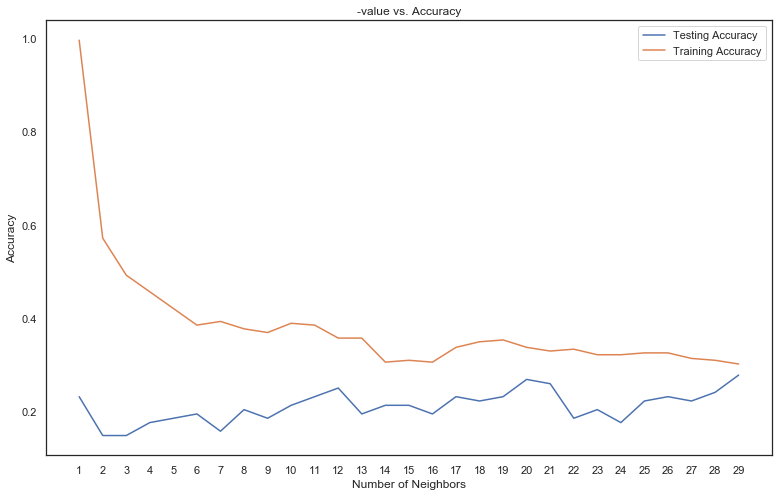

Best Accuracy is 0.2777777777777778 with K = 29


In [44]:
#Best K value selection
neig = np.arange(1,30)
train_accuracy = []
test_accuracy = []
for i, k in enumerate (neig):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))

# Plot
plt.figure(figsize=(13,8))
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value vs. Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print('Best Accuracy is {} with K = {}'.format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

female 5-14 years R^2 Score:  0.09704703339139831


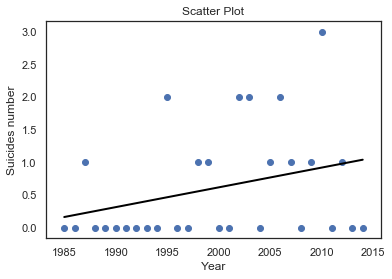

female 15-24 years R^2 Score:  0.31170081392606497


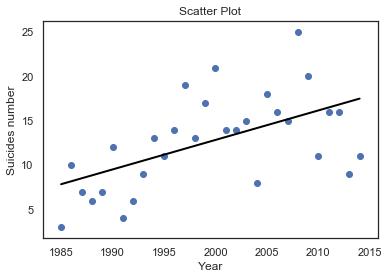

female 25-34 years R^2 Score:  0.4518234739481817


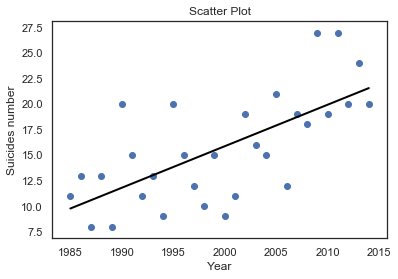

female 35-54 years R^2 Score:  0.522212380672977


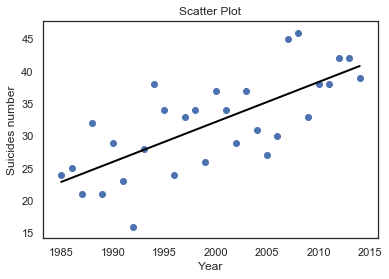

female 55-74 years R^2 Score:  0.004229699666295161


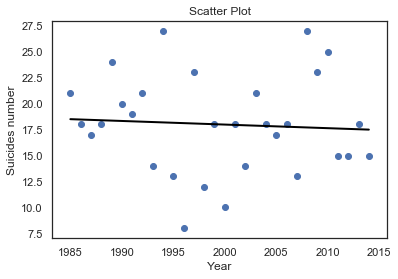

female 75+ years R^2 Score:  0.011235273718858463


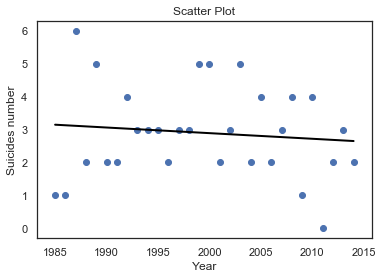

male 5-14 years R^2 Score:  0.024918535288299015


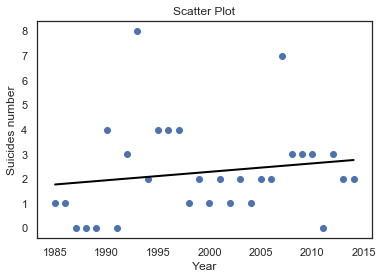

male 15-24 years R^2 Score:  0.138276100637459


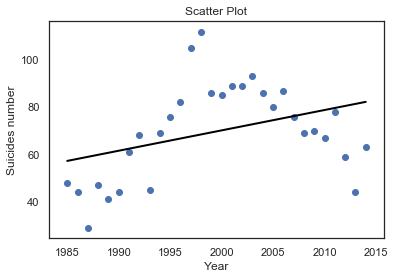

male 25-34 years R^2 Score:  0.44142557394612947


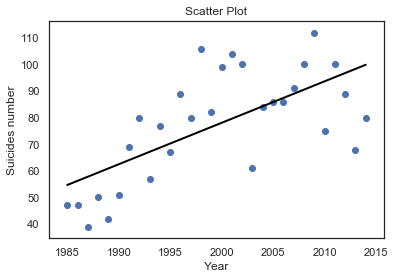

male 35-54 years R^2 Score:  0.8575859671221046


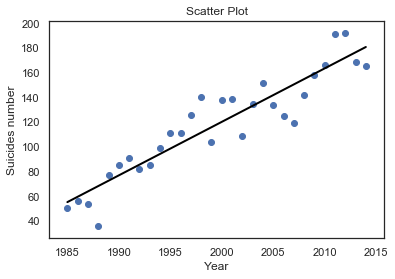

male 55-74 years R^2 Score:  0.4573171819486755


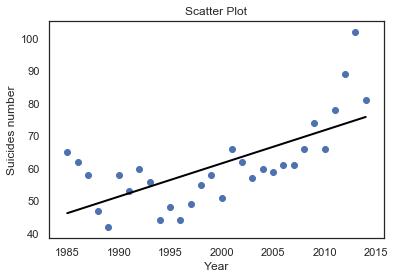

male 75+ years R^2 Score:  0.00623833983828348


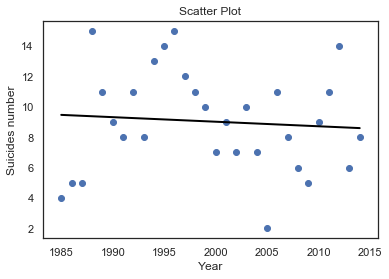

In [45]:
x = np.array(df_Eire.loc[:,'year']).reshape(-1,1)
y = np.array(df_Eire.loc[:,'suicides_no']).reshape(-1,1)

#Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)  # Prediction Space
#print(predict_space)
lis = ['female', 'male']
lis2 = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
for i in lis:
    for k in lis2:
        data_1 = df_Eire[df_Eire['sex'] == i]
        data_sex = data_1[data_1['age'] == k ]
        x_sex = np.array(data_sex.loc[:,'year']).reshape(-1,1)
        y_sex = np.array(data_sex.loc[:,'suicides_no']).reshape(-1,1)
        reg.fit(x_sex,y_sex)                                               # Fit
        predicted = reg.predict(predict_space)                     
        # Prediction
        print( i, k, 'R^2 Score: ', reg.score(x_sex,y_sex))                       # R^2 calculation
        # print(i)
        #plt.figure(figsize = [9,6])
        #print(i,k)
        plt.plot(predict_space, predicted, color = 'black', linewidth = 2)
        plt.scatter(x_sex,y_sex)
        plt.title('Scatter Plot')
        plt.xlabel('Year')
        plt.ylabel('Suicides number')
        plt.show()